## Haberman Cancer Survival Dataset analy

In [33]:
# Read the Dataset
haberman = pd.read_csv("haberman.csv")

In [34]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [35]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [38]:
#(Q) How many data points for each class are present? 
haberman["status"].value_counts()

status
1    225
2     81
Name: count, dtype: int64

- This dataset is unbalanced 

## 2D Scatter Plot

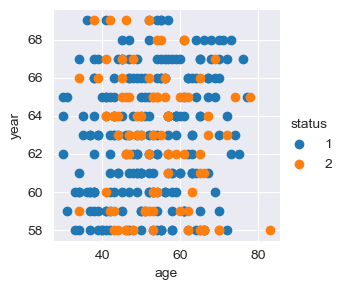

In [40]:
#scatter plot using colour coding
#using age and year
sns.set_style("darkgrid");
sns.FacetGrid(haberman, hue="status") \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

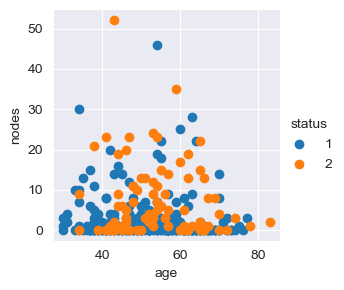

In [41]:
#scatter plot using colour coding
#using age and year
sns.set_style("darkgrid");
sns.FacetGrid(haberman, hue="status") \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

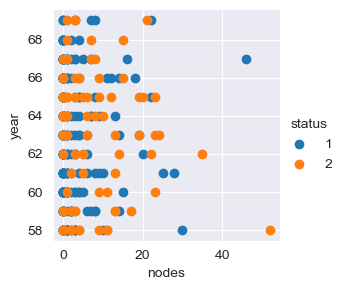

In [42]:
#scatter plot using colour coding
#using age and year
sns.set_style("darkgrid");
sns.FacetGrid(haberman, hue="status") \
   .map(plt.scatter, "nodes", "year") \
   .add_legend();
plt.show();

***From all the 3, it's difficult to differentiate just using 2d scatter plot***

## Pair Plot 

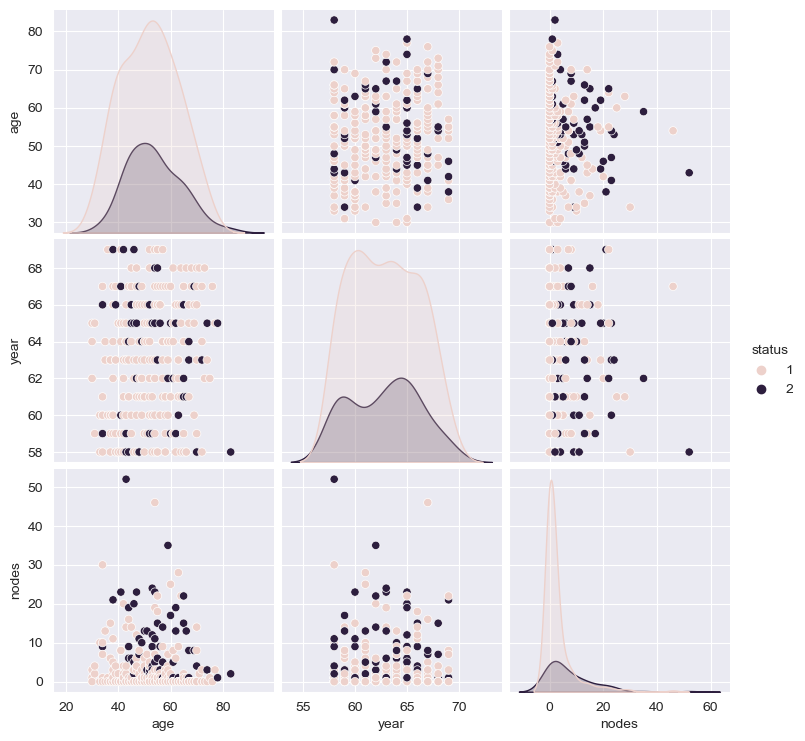

In [44]:
plt.close();
sns.set_style("darkgrid");
sns.pairplot(haberman, hue="status");
plt.show()


## Histogram, Probability Density Function (PDF), Cumulative Density Function (CDF)

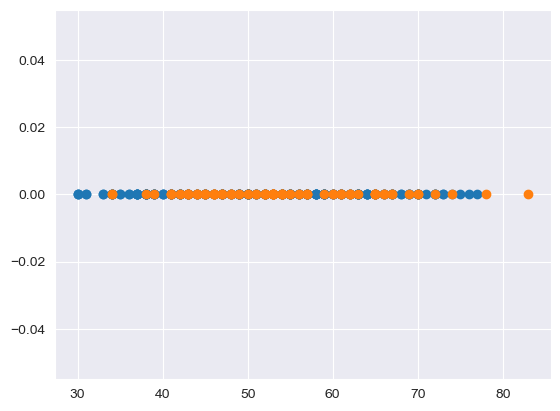

In [50]:
#1-D scatter plot
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];
# print(haberman_1["age"])
plt.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'o')


plt.show()


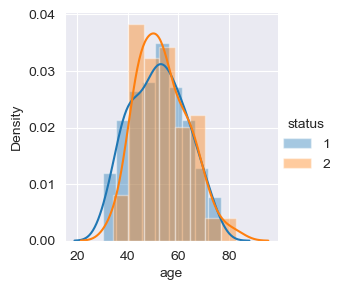

In [51]:
sns.FacetGrid(haberman, hue="status") \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



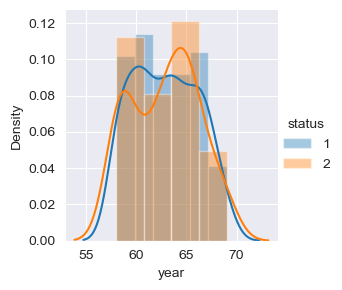

In [52]:
sns.FacetGrid(haberman, hue="status") \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

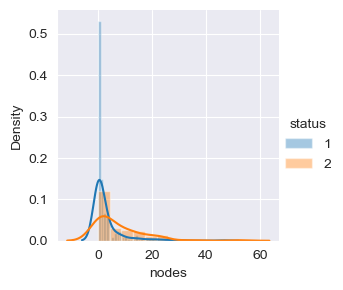

In [55]:
sns.FacetGrid(haberman, hue="status") \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


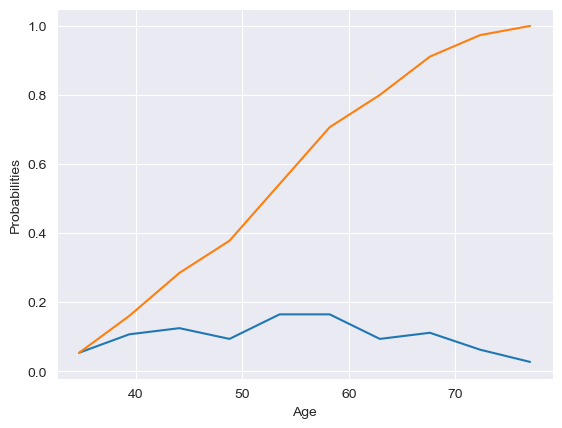

In [58]:
#Plot CDF of petal_length

counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.ylabel('Probabilities')

counts, bin_edges = np.histogram(haberman_1['age'], bins=20, 
                                 density = True)

plt.show();


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


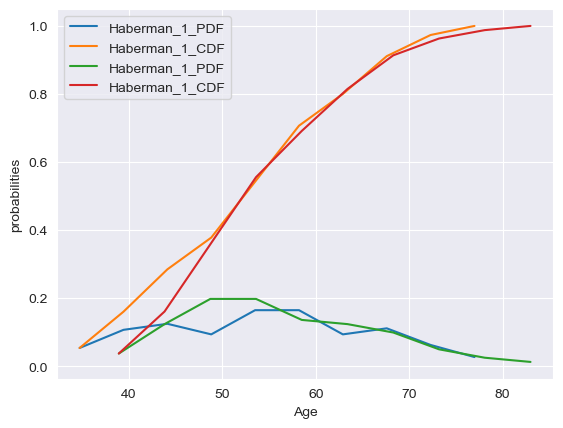

In [59]:
# Plots of CDF of Age for all status codes

# Status 1
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Haberman_1_PDF')
plt.plot(bin_edges[1:], cdf,label='Haberman_1_CDF')


# Status 2
counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Haberman_1_PDF')
plt.plot(bin_edges[1:], cdf,label='Haberman_1_CDF')

plt.xlabel('Age')
plt.ylabel('probabilities')
plt.legend()

plt.show();

- Lot of overlap between the 2 classes. So can't be easily differentiated 

## Mean, Variance and Std-dev

In [60]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_1["age"]))

#Mean with an outlier.
print(np.mean(np.append(haberman_1["age"],50)));
print(np.mean(haberman_2["age"]))

print("\nStd-dev:");
print(np.std(haberman_1["age"]))
print(np.std(haberman_2["age"]))

Means:
52.01777777777778
52.008849557522126
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


# Median, Percentile, Quantile, Interquartile Range (IQR), Median Absolute Deviation (MAD)

In [61]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_1["age"]))
#Median with an outlier
print(np.median(np.append(haberman_1["age"],50)));
print(np.median(haberman_2["age"]))


print("\nQuantiles:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))


Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# Box plot and Whiskers

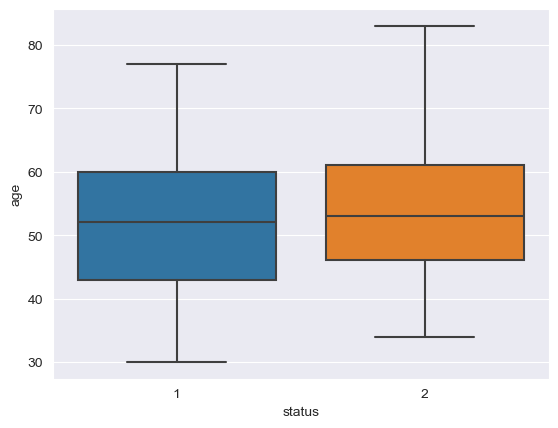

In [63]:
sns.boxplot(x='status',y='age', data=haberman)
plt.savefig('plot.png')
plt.show()


# Violin plots

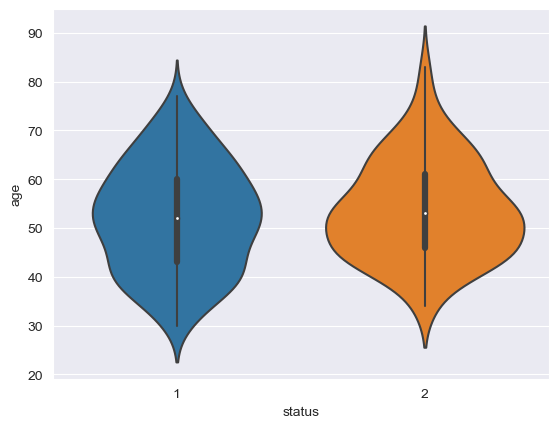

In [65]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()